In [1]:
# importing necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

plt.style.use("seaborn-dark")
%matplotlib inline

In [2]:
# loading the data set
df = pd.read_csv("df_41.csv")

In [3]:
# data cleaning and indexing
df.drop("zip_code", axis=1, inplace=True)

df.occurred_date_time = df.occurred_date_time.astype("datetime64")
df.set_index(["occurred_date_time"], inplace=True)
df.sort_index(inplace=True)

# examining the new data frame
display(df.head())
display(df.tail())

highest_offense_description     report_date_time  \
occurred_date_time                                                         
2003-01-01 00:00:00                  IDENTITY THEFT  2012-05-25 11:04:00   
2003-01-01 00:01:00                  IDENTITY THEFT  2008-07-23 11:07:00   
2003-01-01 00:01:00             ASSAULT WITH INJURY  2003-01-23 15:18:00   
2003-01-01 00:01:00  AGG SEXUAL ASSAULT CHILD/OBJEC  2015-07-03 08:11:00   
2003-01-01 00:01:00                  IDENTITY THEFT  2011-03-07 15:00:00   

                                    location_type              address  \
occurred_date_time                                                       
2003-01-01 00:00:00              RESIDENCE / HOME        1105 LILY TER   
2003-01-01 00:01:00              RESIDENCE / HOME    2430 CROMWELL CIR   
2003-01-01 00:01:00  STREETS / HWY / ROAD / ALLEY  600 BLOCK VARGAS RD   
2003-01-01 00:01:00              RESIDENCE / HOME  6400 BLOCK LYNCH LN   
2003-01-01 00:01:00              RESIDENCE / HOME       1845 BURTON DR   

                     council_district apd_sector  apd_district  \
occurred_date_time                                               
2003-01-01 00:00:00               3.0         HE           3.0   
2003-01-01 00:01:00               3.0         HE           4.0   
2003-01-01 00:01:00               3.0         HE           5.0   
2003-01-01 00:01:00               3.0         HE           5.0   
2003-01-01 00:01:00               3.0         HE           2.0   

                    clearance_status       clearance_date   latitude  \
occurred_date_time                                                     
2003-01-01 00:00:00                N  2012-05-25 00:00:00  30.234098   
2003-01-01 00:01:00              NaN  2008-08-25 00:00:00  30.226640   
2003-01-01 00:01:00                O  2003-01-29 00:00:00  30.236581   
2003-01-01 00:01:00                N  2016-05-31 00:00:00        NaN   
2003-01-01 00:01:00                N  2011-03-16 00:00:00  30.234429   

                     longitude  year  month  week  day  hour  
occurred_date_time                                            
2003-01-01 00:00:00 -97.701901  2003      1     1    1     0  
2003-01-01 00:01:00 -97.721057  2003      1     1    1     0  
2003-01-01 00:01:00 -97.692129  2003      1     1    1     0  
2003-01-01 00:01:00        NaN  2003      1     1    1     0  
2003-01-01 00:01:00 -97.729699  2003      1     1    1     0

highest_offense_description     report_date_time  \
occurred_date_time                                                     
2020-12-05 12:03:00                  AUTO THEFT  2020-12-05 12:03:00   
2020-12-05 13:17:00    ASSAULT ON PEACE OFFICER  2020-12-05 13:17:00   
2020-12-05 15:26:00                 AGG ASSAULT  2020-12-05 16:47:00   
2020-12-05 17:36:00         DISTURBANCE - OTHER  2020-12-05 17:36:00   
2020-12-05 19:18:00                         DWI  2020-12-05 19:18:00   

                                    location_type  \
occurred_date_time                                  
2020-12-05 12:03:00  STREETS / HWY / ROAD / ALLEY   
2020-12-05 13:17:00  STREETS / HWY / ROAD / ALLEY   
2020-12-05 15:26:00         PARKING LOTS / GARAGE   
2020-12-05 17:36:00  STREETS / HWY / ROAD / ALLEY   
2020-12-05 19:18:00  STREETS / HWY / ROAD / ALLEY   

                                              address  council_district  \
occurred_date_time                                                        
2020-12-05 12:03:00  S IH 35 SVRD NB / E RIVERSIDE DR               9.0   
2020-12-05 13:17:00               1500 TINNIN FORD RD               3.0   
2020-12-05 15:26:00                1600 ROYAL HILL DR               3.0   
2020-12-05 17:36:00               2426 E RIVERSIDE DR               3.0   
2020-12-05 19:18:00         1100 S PLEASANT VALLEY RD               3.0   

                    apd_sector  apd_district clearance_status  \
occurred_date_time                                              
2020-12-05 12:03:00         HE           1.0                C   
2020-12-05 13:17:00         HE           2.0                C   
2020-12-05 15:26:00         HE           2.0                N   
2020-12-05 17:36:00         HE           2.0                N   
2020-12-05 19:18:00         HE           2.0              NaN   

                          clearance_date   latitude  longitude  year  month  \
occurred_date_time                                                            
2020-12-05 12:03:00  2020-12-05 00:00:00  30.247841 -97.734891  2020     12   
2020-12-05 13:17:00  2020-12-05 00:00:00  30.242187 -97.725863  2020     12   
2020-12-05 15:26:00  2020-12-05 00:00:00  30.227973 -97.743363  2020     12   
2020-12-05 17:36:00  2020-12-05 00:00:00  30.235790 -97.724135  2020     12   
2020-12-05 19:18:00                  NaN  30.240690 -97.718425  2020     12   

                     week  day  hour  
occurred_date_time                    
2020-12-05 12:03:00    49    5    12  
2020-12-05 13:17:00    49    5    13  
2020-12-05 15:26:00    49    5    15  
2020-12-05 17:36:00    49    5    17  
2020-12-05 19:18:00    49    5    19

In [4]:
# Creating violent crime and murder data frames for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_mur = df[df.highest_offense_description == "MURDER"]
df_mur_cap = df[df.highest_offense_description == "CAPITAL MURDER"]
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]
df_rape = df[df.highest_offense_description == "RAPE"]


# Annual overall crime (2017-present)
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime (2017-present)
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders (2017-present)
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

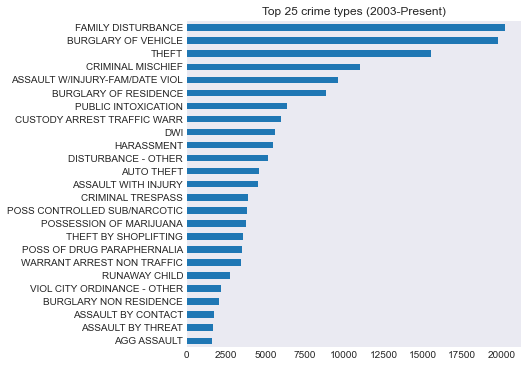

----------------------------------------------------------
----------------------------------------------------------


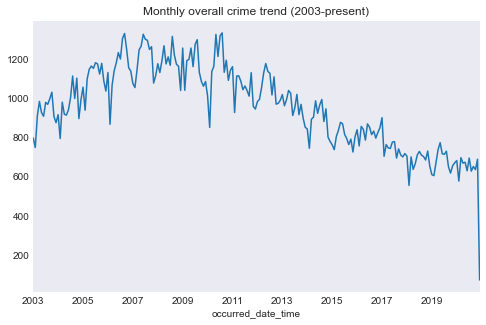

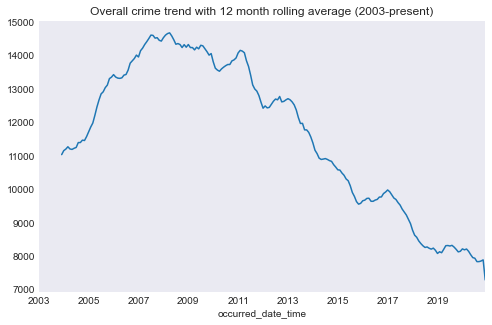

----------------------------------------------------------
----------------------------------------------------------


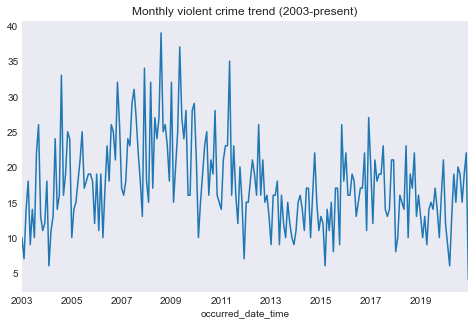

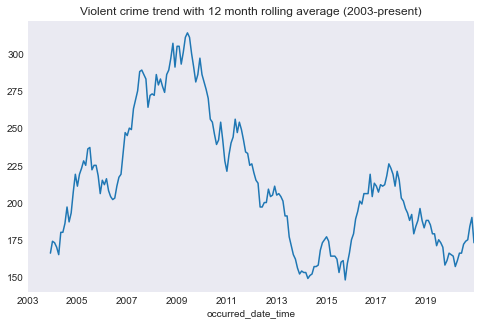

In [5]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(6, 6), title="Top 25 crime types (2003-Present)"
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

df.resample("M").size().plot(
    title="Monthly overall crime trend (2003-present)", figsize=(8, 5)
)
plt.show()

# Violent crime trend with a year rolling average
df.resample("M").size().rolling(12).sum().plot(
    title="Overall crime trend with 12 month rolling average (2003-present)",
    figsize=(8, 5),
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

# Plotting violent crime trend on a monthly basis
df_viol.resample("M").size().plot(
    title="Monthly violent crime trend (2003-present)", figsize=(8, 5)
)
plt.show()

# Violent crime trend with a year rolling average
df_viol.resample("M").size().rolling(12).sum().plot(
    title="Violent crime trend with 12 month rolling average (2003-present)",
    figsize=(8, 5),
)
plt.show()

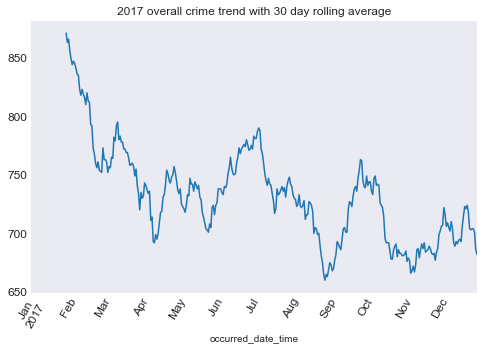

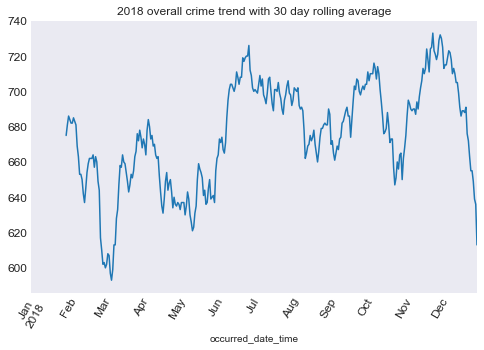

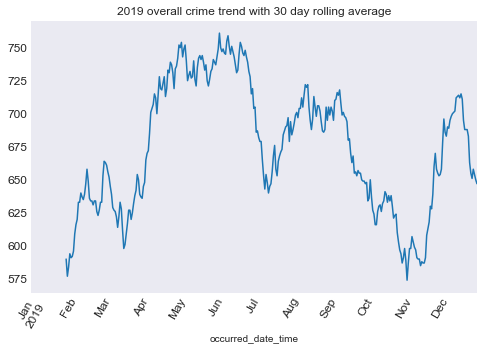

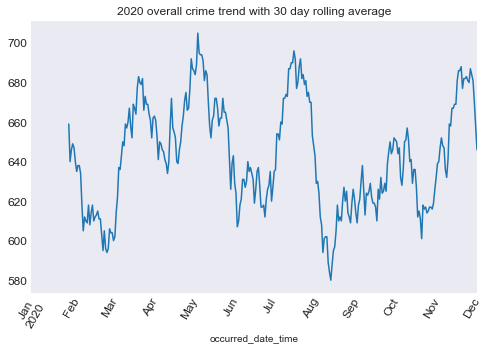

In [6]:
df_17.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2017 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_18.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2018 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_19.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2019 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_20.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2020 overall crime trend with 30 day rolling average",
)
plt.show()

# ax = df_20.plot(x="year", figsize=(10, 6), label="overall crime")
# df_viol_20.plot(x="year", label="violent crime", ax=ax, rot=60)
# plt.show()

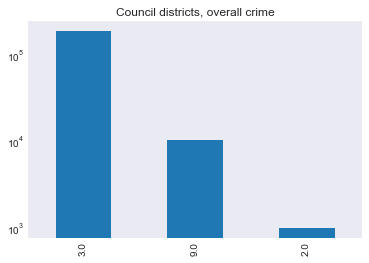

----------------------------------------------------------


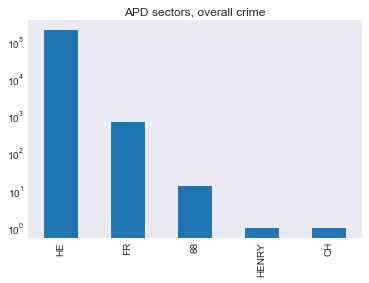

----------------------------------------------------------


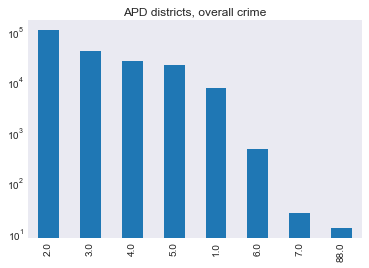

In [7]:
# Showing overall crime rates by council districts, APD districts, and sectors
df.council_district.value_counts().plot.bar(
    title="Council districts, overall crime", logy=True
)
plt.show()

print("----------------------------------------------------------")

df.apd_sector.value_counts().plot.bar(title="APD sectors, overall crime", logy=True)
plt.show()

print("----------------------------------------------------------")

df.apd_district.value_counts().plot.bar(title="APD districts, overall crime", logy=True)
plt.show()

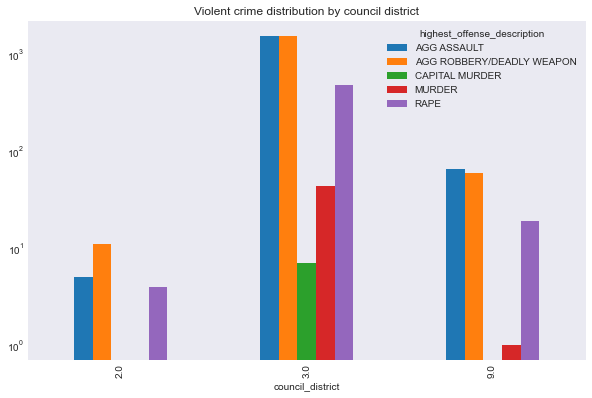

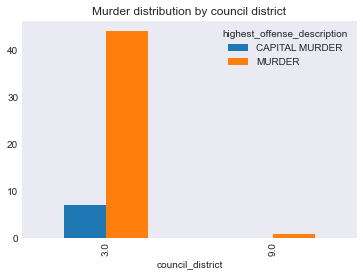

----------------------------------------------------------
----------------------------------------------------------


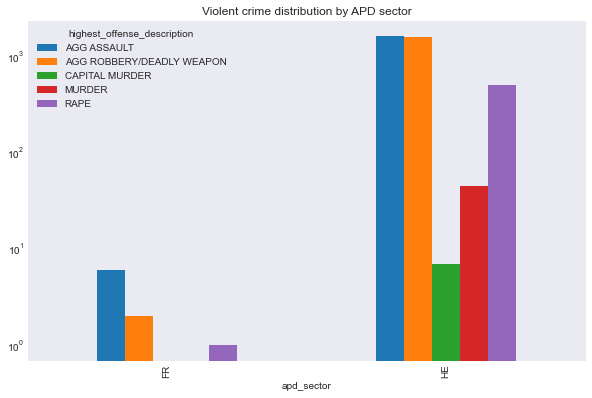

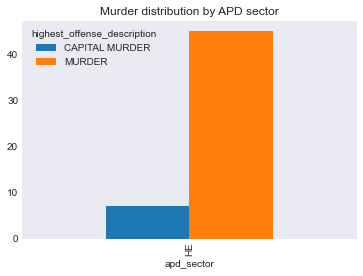

----------------------------------------------------------
----------------------------------------------------------


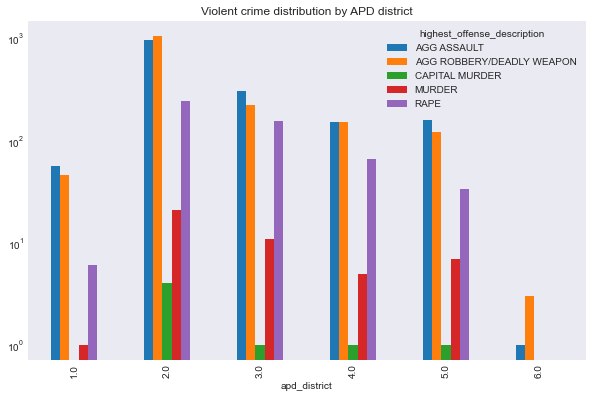

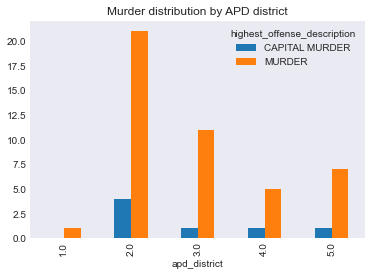

In [8]:
# Showing violent crime and murder rates by council districts, APD districts, and sectors
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25),
    logy=True,
    title="Violent crime distribution by council district",
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(title="Murder distribution by council district")
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25), logy=True, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD sector"
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25), logy=True, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD district"
)
plt.show()

highest_offense_description                     AGG ASSAULT  \
location_type                                                 
BANKS / SAVINGS & LOAN                                    1   
BAR / NIGHT CLUB                                         57   
CAMP / CAMPGROUND                                         0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                      0   
COMMERCIAL / OFFICE BUILDING                             20   
CONSTRUCTION SITE                                         1   
CONVENIENCE STORE                                        28   
DEPARTMENT / DISCOUNT STORE                               0   
DRUG STORE / DR. OFFICE / HOSPITAL                        0   
FIELD / WOODS                                            27   
GAS / SERVICE STATIONS                                   14   
GOVERNMENT / PUBLIC BUILDING                              4   
GROCERY / SUPERMARKET                                     8   
HOTEL / MOTEL / ETC.                                     16   
LAKE / WATERWAY                                           0   
LIQUOR STORE                                              1   
OTHER / UNKNOWN                                          40   
PARK / PLAYGROUND                                         4   
PARKING LOTS / GARAGE                                   506   
RENTAL STORAGE FACILITY                                   2   
RESIDENCE / HOME                                        500   
RESTAURANTS                                              11   
SCHOOL - ELEMENTARY / SECONDARY                           0   
SCHOOLS / COLLEGES                                        2   
SHOPPING MALL                                             0   
SPECIALTY  STORE (TV  FUR ETC.)                           1   
STREETS / HWY / ROAD / ALLEY                            382   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)           10   

highest_offense_description                     AGG ROBBERY/DEADLY WEAPON  \
location_type                                                               
BANKS / SAVINGS & LOAN                                                  0   
BAR / NIGHT CLUB                                                       10   
CAMP / CAMPGROUND                                                       1   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                                    1   
COMMERCIAL / OFFICE BUILDING                                           68   
CONSTRUCTION SITE                                                       0   
CONVENIENCE STORE                                                      69   
DEPARTMENT / DISCOUNT STORE                                             4   
DRUG STORE / DR. OFFICE / HOSPITAL                                      3   
FIELD / WOODS                                                          12   
GAS / SERVICE STATIONS                                                 36   
GOVERNMENT / PUBLIC BUILDING                                            2   
GROCERY / SUPERMARKET                                                   4   
HOTEL / MOTEL / ETC.                                                   31   
LAKE / WATERWAY                                                         2   
LIQUOR STORE                                                            2   
OTHER / UNKNOWN                                                        25   
PARK / PLAYGROUND                                                       4   
PARKING LOTS / GARAGE                                                 628   
RENTAL STORAGE FACILITY                                                 0   
RESIDENCE / HOME                                                      295   
RESTAURANTS                                                            26   
SCHOOL - ELEMENTARY / SECONDARY                                         1   
SCHOOLS / COLLEGES                                                      0   
SHOPPING MALL                                                           3   
SPECIALTY  STORE (TV  FUR ETC.

----------------------------------------------------------
----------------------------------------------------------


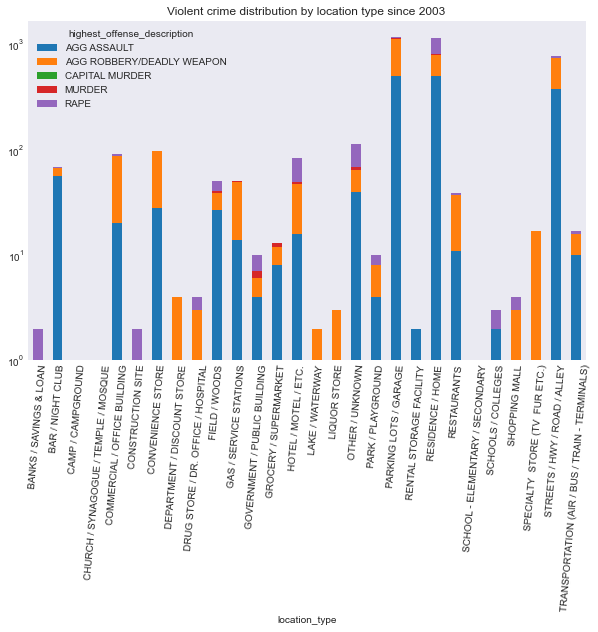

----------------------------------------------------------
----------------------------------------------------------


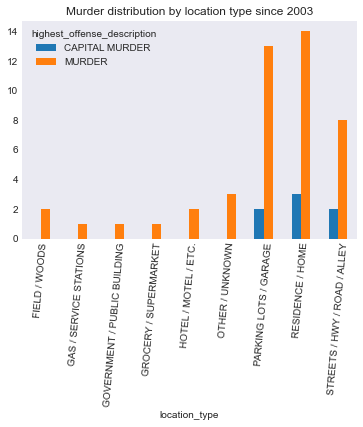

In [9]:
# Showing violent crime and murder rates by location type
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)

print("----------------------------------------------------------")
print("----------------------------------------------------------")

mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

viol_loc.plot.bar(
    stacked=True,
    figsize=(10, 6.25),
    logy=True,
    rot=85,
    title="Violent crime distribution by location type since 2003",
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

mur_loc.plot.bar(rot=85, title="Murder distribution by location type since 2003")
plt.show()

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


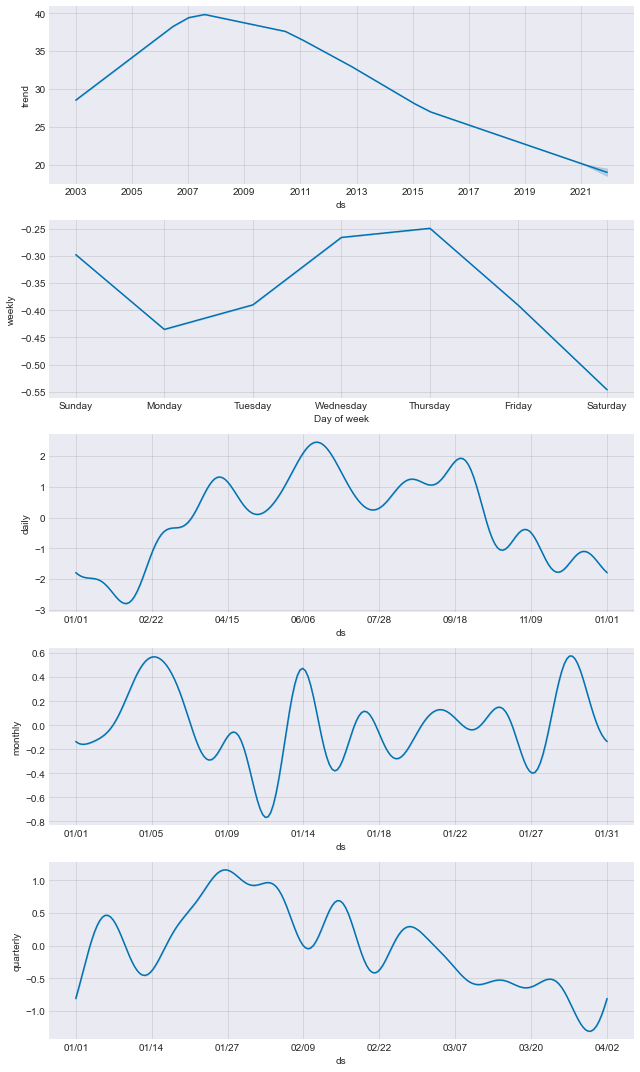

In [10]:
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")
pred = m.predict(future)

fig2 = m.plot_components(pred)
fig2_1 = plot_plotly(m, pred)
fig2_1